# Database source

## [Kaggle database](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)

# Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Read the data, finding missing values

In [6]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<AxesSubplot:>

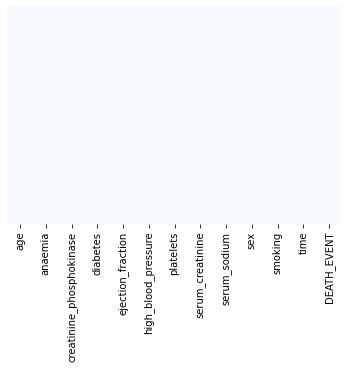

In [8]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# EDA

## Check number of male and females on the dataset

In [8]:
df['sex'].value_counts() # 1 stands for male and 0 for female

1    194
0    105
Name: sex, dtype: int64

In [9]:
male= df['sex'].value_counts().values[0]
female = df['sex'].value_counts().values[1]

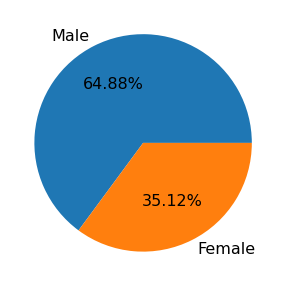

In [10]:
label = ['Male','Female']
plt.figure(figsize=(5,5))
emails = [male,female]
plt.pie(emails, labels=label, textprops= {'fontsize': 16},autopct='%1.2f%%')
plt.show()

## Check how many people died by sex

In [11]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

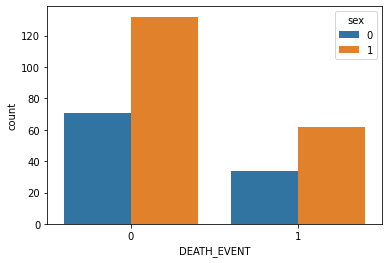

In [12]:
sns.countplot(x = 'DEATH_EVENT', data = df, hue='sex') # 

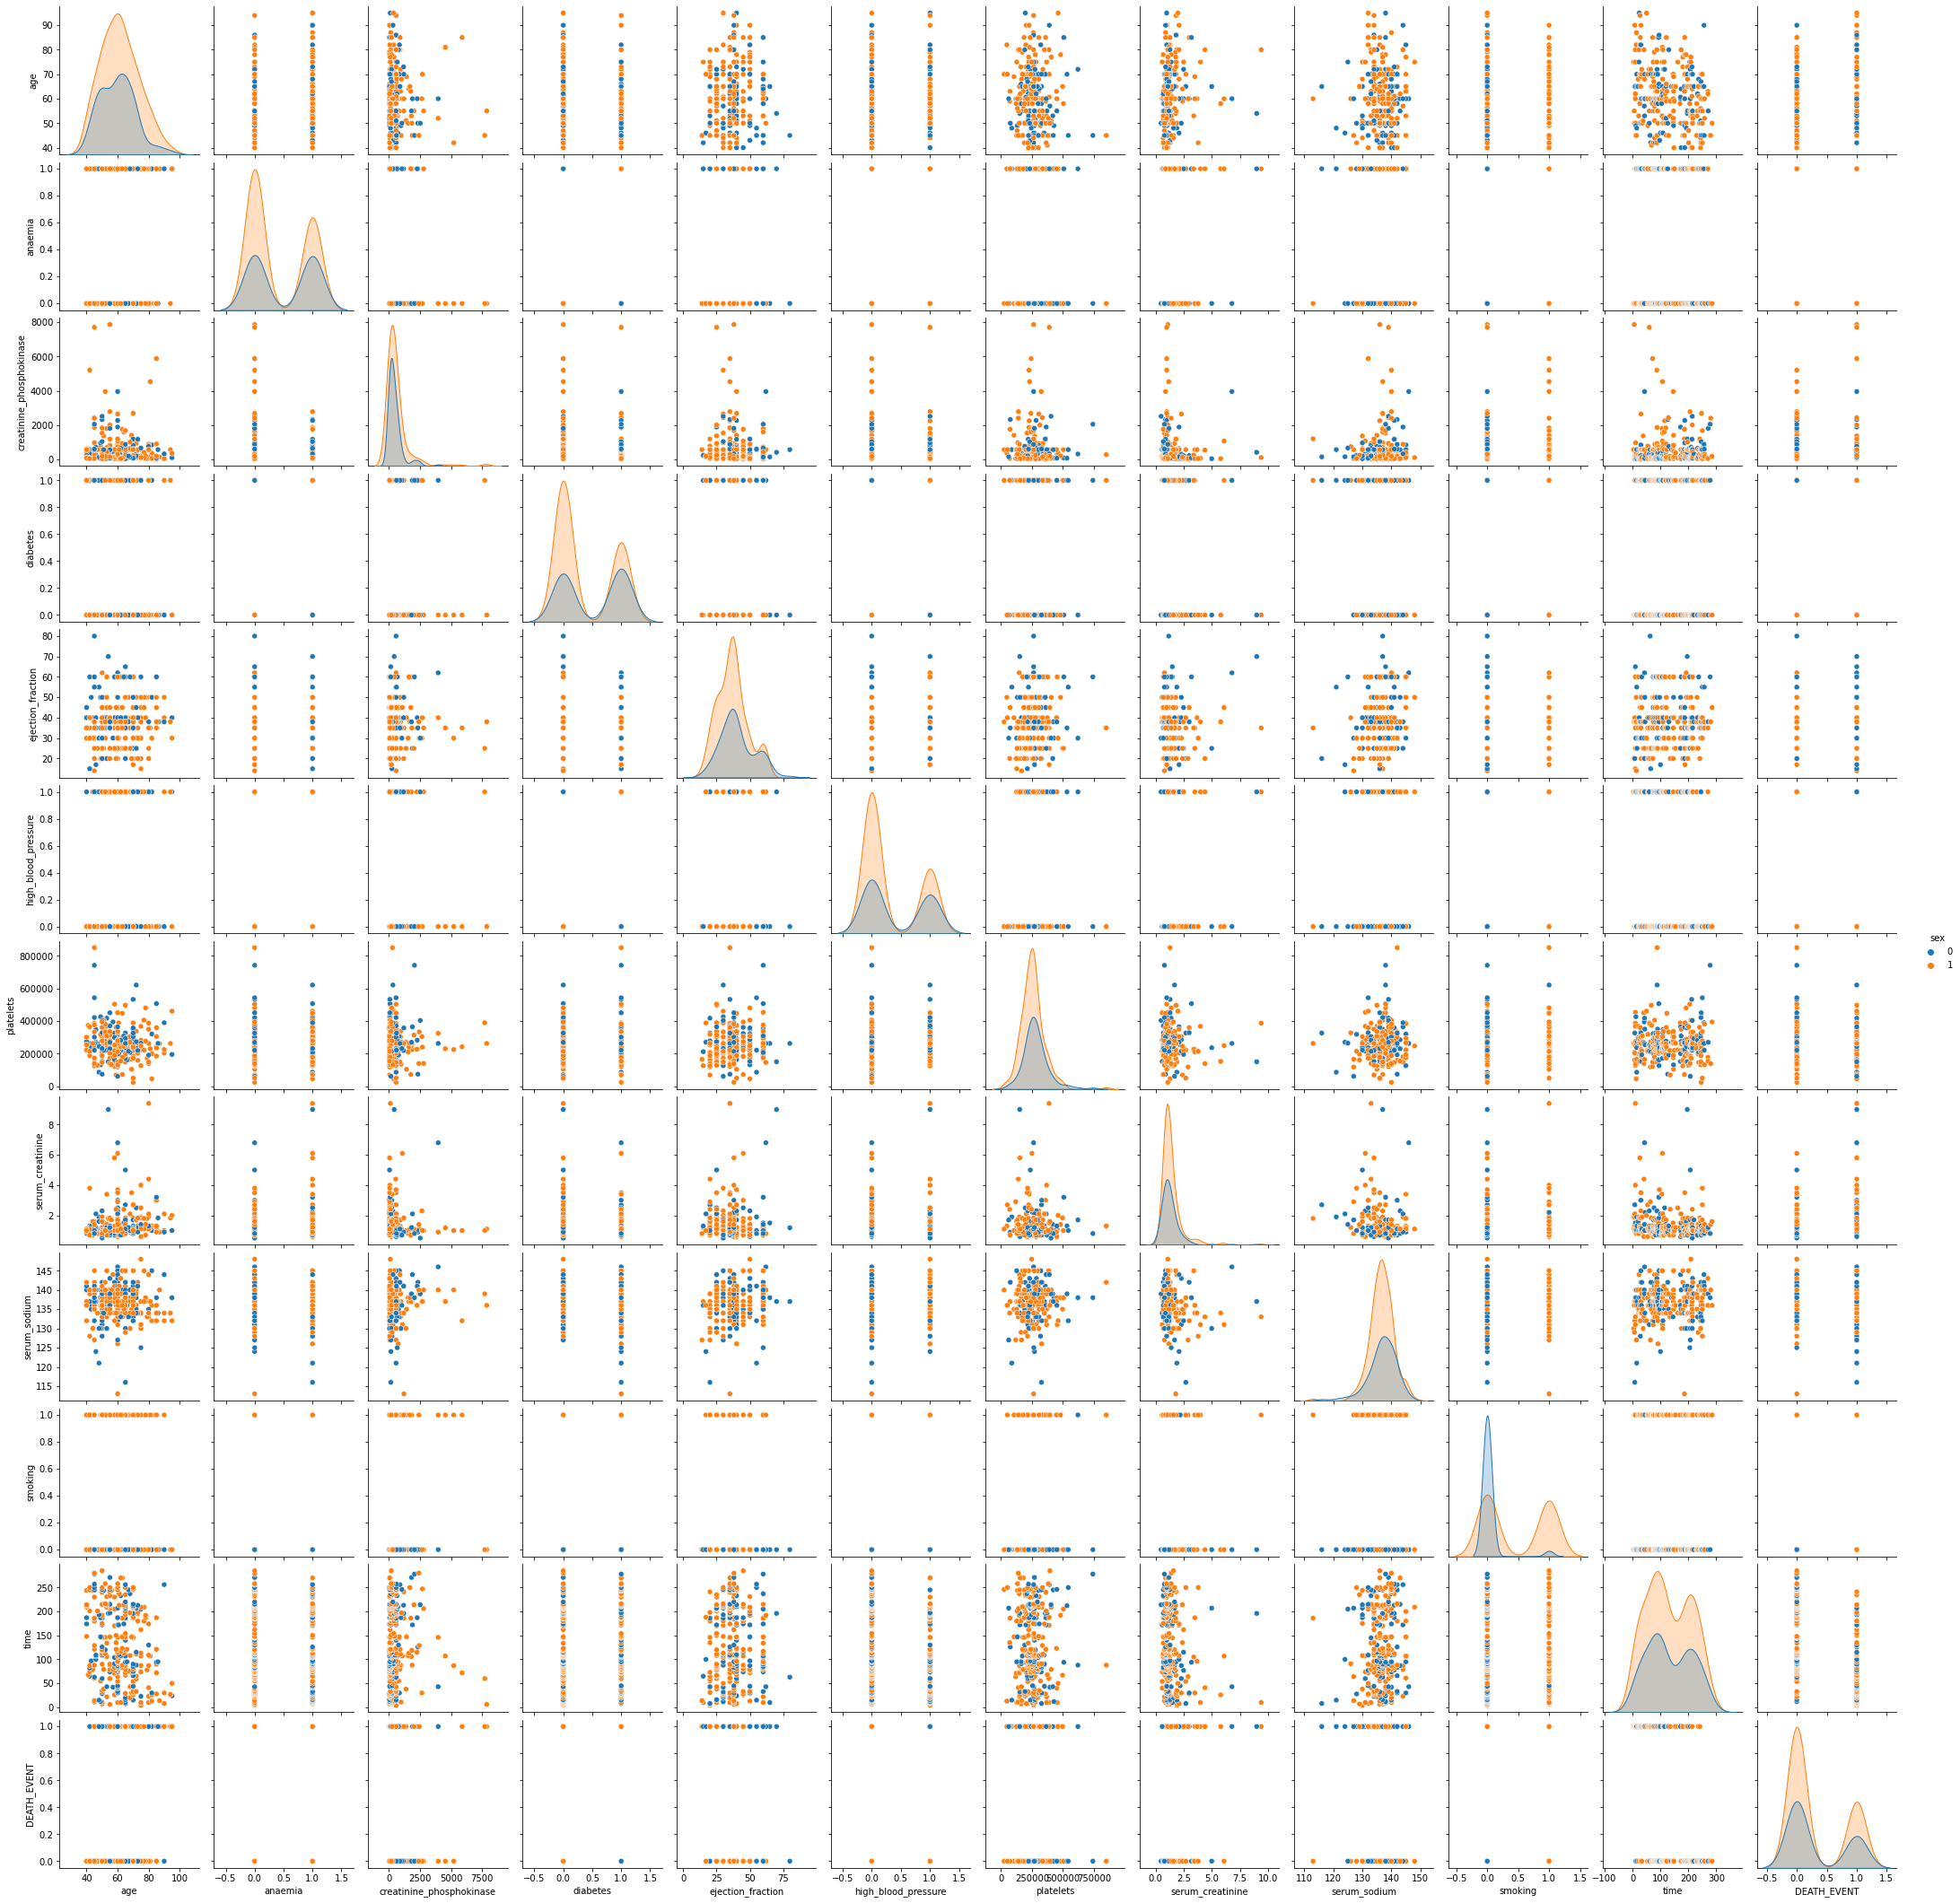

In [13]:
sns.pairplot(df,hue='sex')

In [35]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

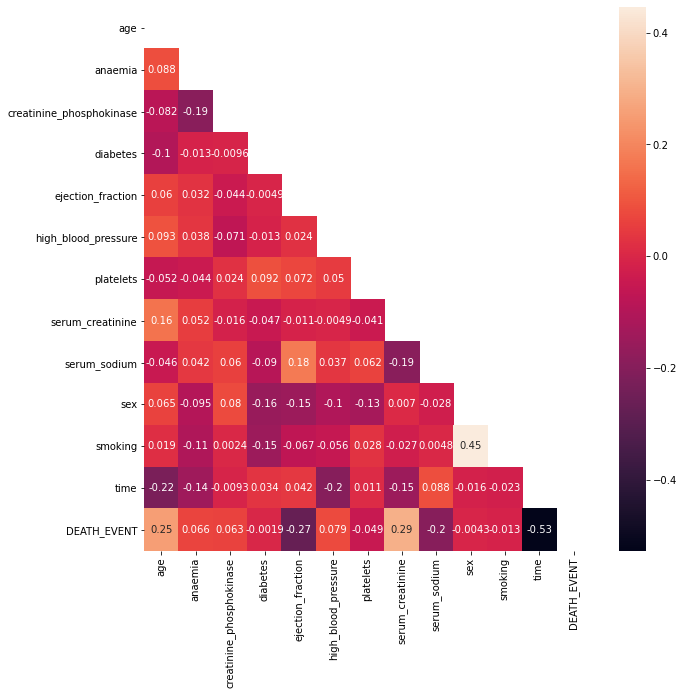

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),mask=mask, annot=True, annot_kws={'size':10})
plt.show()

In [23]:
df_died = df[df['DEATH_EVENT']==1]

In [24]:
df_survived = df[df['DEATH_EVENT']==0]

#### Age distribution of people that died 

In [25]:
df_died['age'].describe()

count    96.000000
mean     65.215281
std      13.214556
min      42.000000
25%      55.000000
50%      65.000000
75%      75.000000
max      95.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

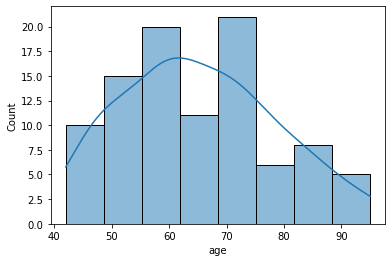

In [29]:
sns.histplot(df_died['age'],kde=True)

#### Level concentration of CPK (mcg/L)

In [30]:
df_died['creatinine_phosphokinase'].describe()

count      96.000000
mean      670.197917
std      1316.580640
min        23.000000
25%       128.750000
50%       259.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

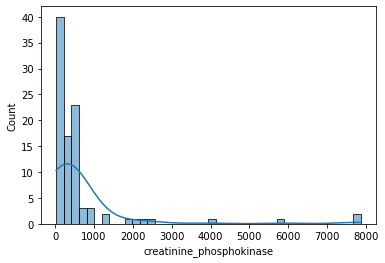

In [31]:
sns.histplot(df_died['creatinine_phosphokinase'],kde=True)

In [32]:
df_survived['creatinine_phosphokinase'].describe()

count     203.000000
mean      540.054187
std       753.799572
min        30.000000
25%       109.000000
50%       245.000000
75%       582.000000
max      5209.000000
Name: creatinine_phosphokinase, dtype: float64

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

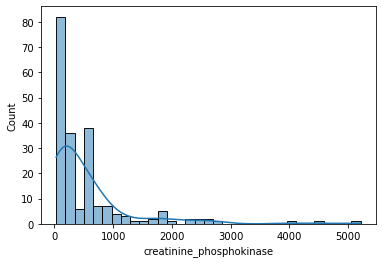

In [40]:
sns.histplot(df_survived['creatinine_phosphokinase'],kde=True)

#### Level of platelets (kiloplatelets/mL)

In [56]:
df_died['platelets'].describe()

count        96.000000
mean     256381.044792
std       98525.682856
min       47000.000000
25%      197500.000000
50%      258500.000000
75%      311000.000000
max      621000.000000
Name: platelets, dtype: float64

<AxesSubplot:xlabel='platelets', ylabel='Count'>

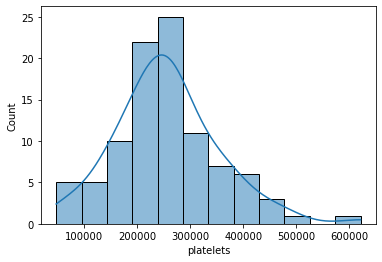

In [57]:
sns.histplot(df_died['platelets'],kde=True)

In [58]:
df_survived['platelets'].describe()

count       203.000000
mean     266657.489901
std       97531.202283
min       25100.000000
25%      219500.000000
50%      263000.000000
75%      302000.000000
max      850000.000000
Name: platelets, dtype: float64

<AxesSubplot:xlabel='platelets', ylabel='Count'>

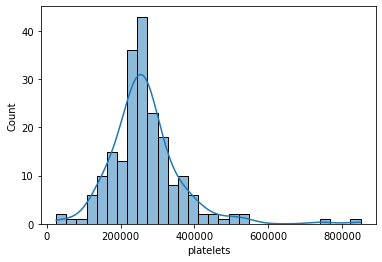

In [59]:
sns.histplot(df_survived['platelets'],kde=True)

#### Level of ejection , i.e. percentage of blood leaving the heart at each contraction

In [60]:
df_died['ejection_fraction'].describe()

count    96.000000
mean     33.468750
std      12.525303
min      14.000000
25%      25.000000
50%      30.000000
75%      38.000000
max      70.000000
Name: ejection_fraction, dtype: float64

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

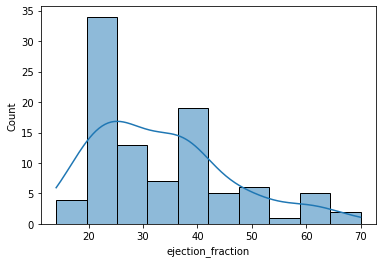

In [61]:
sns.histplot(df_died['ejection_fraction'],kde=True)

In [62]:
df_survived['ejection_fraction'].describe()

count    203.000000
mean      40.266010
std       10.859963
min       17.000000
25%       35.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

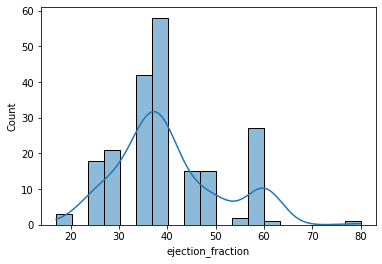

In [63]:
sns.histplot(df_survived['ejection_fraction'],kde=True)

#### Creatinine levels (mg/dL)

In [64]:
df_died['serum_creatinine'].describe()

count    96.000000
mean      1.835833
std       1.468562
min       0.600000
25%       1.075000
50%       1.300000
75%       1.900000
max       9.400000
Name: serum_creatinine, dtype: float64

<AxesSubplot:xlabel='serum_creatinine', ylabel='Count'>

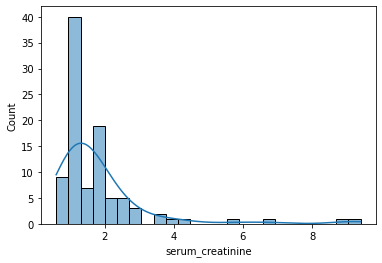

In [66]:
sns.histplot(df_died['serum_creatinine'],kde=True)

In [67]:
df_survived['serum_creatinine'].describe()

count    203.000000
mean       1.184877
std        0.654083
min        0.500000
25%        0.900000
50%        1.000000
75%        1.200000
max        6.100000
Name: serum_creatinine, dtype: float64

<AxesSubplot:xlabel='serum_creatinine', ylabel='Count'>

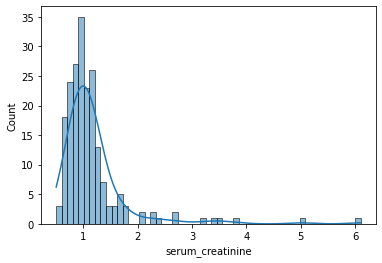

In [68]:
sns.histplot(df_survived['serum_creatinine'],kde=True)

#### Sodium levels (mEq/L)

In [69]:
df_died['serum_sodium'].describe()

count     96.000000
mean     135.375000
std        5.001579
min      116.000000
25%      133.000000
50%      135.500000
75%      138.250000
max      146.000000
Name: serum_sodium, dtype: float64

<AxesSubplot:xlabel='serum_sodium', ylabel='Count'>

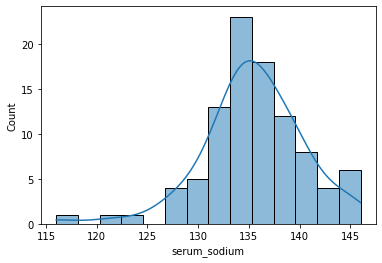

In [70]:
sns.histplot(df_died['serum_sodium'],kde=True)

In [72]:
df_survived['serum_sodium'].describe()

count    203.000000
mean     137.216749
std        3.982923
min      113.000000
25%      135.500000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64

<AxesSubplot:xlabel='serum_sodium', ylabel='Count'>

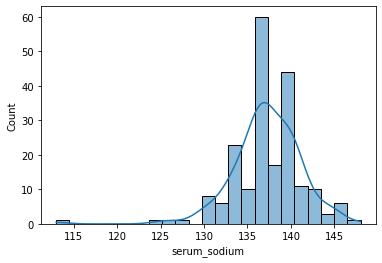

In [71]:
sns.histplot(df_survived['serum_sodium'],kde=True)

#### Follow-up period (days)

In [73]:
df_died['time'].describe()

count     96.000000
mean      70.885417
std       62.378281
min        4.000000
25%       25.500000
50%       44.500000
75%      102.250000
max      241.000000
Name: time, dtype: float64

<AxesSubplot:xlabel='time', ylabel='Count'>

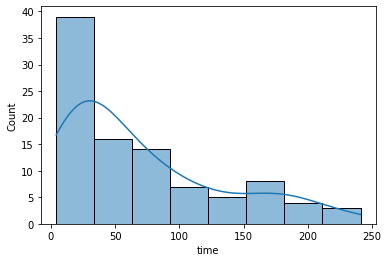

In [74]:
sns.histplot(df_died['time'],kde=True)

#### People with and without anemia

In [42]:
df_survived['anaemia'].value_counts()

0    120
1     83
Name: anaemia, dtype: int64

<AxesSubplot:xlabel='anaemia', ylabel='count'>

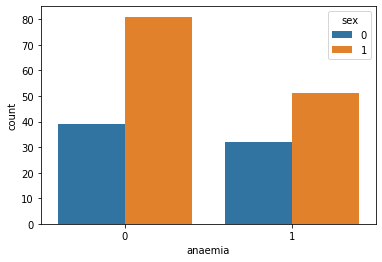

In [43]:
sns.countplot(x = 'anaemia', data = df_survived, hue='sex')

In [44]:
df_died['anaemia'].value_counts()

0    50
1    46
Name: anaemia, dtype: int64

<AxesSubplot:xlabel='anaemia', ylabel='count'>

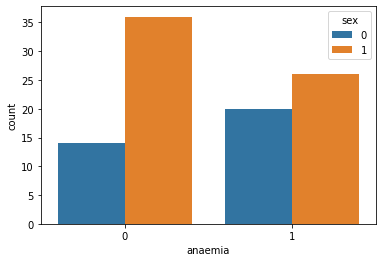

In [45]:
sns.countplot(x = 'anaemia', data = df_died, hue='sex')

#### People with and without diabetes

In [46]:
df_survived['diabetes'].value_counts()

0    118
1     85
Name: diabetes, dtype: int64

<AxesSubplot:xlabel='diabetes', ylabel='count'>

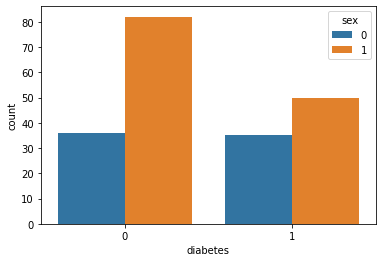

In [47]:
sns.countplot(x = 'diabetes', data = df_survived, hue='sex')

In [48]:
df_died['diabetes'].value_counts()

0    56
1    40
Name: diabetes, dtype: int64

<AxesSubplot:xlabel='diabetes', ylabel='count'>

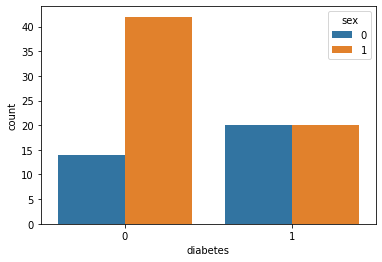

In [49]:
sns.countplot(x = 'diabetes', data = df_died, hue='sex')

#### People smoking and not smoking

In [50]:
df_survived['smoking'].value_counts()

0    137
1     66
Name: smoking, dtype: int64

<AxesSubplot:xlabel='smoking', ylabel='count'>

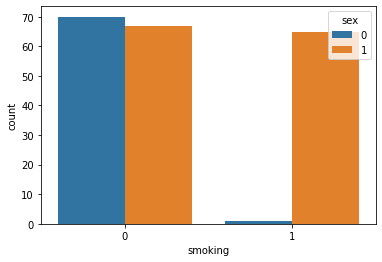

In [51]:
sns.countplot(x = 'smoking', data = df_survived, hue='sex')

In [52]:
df_died['smoking'].value_counts()

0    66
1    30
Name: smoking, dtype: int64

<AxesSubplot:xlabel='smoking', ylabel='count'>

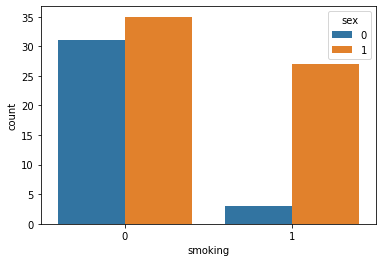

In [53]:
sns.countplot(x = 'smoking', data = df_died, hue='sex')

#### People with high-blood pressure

In [54]:
df_died['high_blood_pressure'].value_counts()

0    57
1    39
Name: high_blood_pressure, dtype: int64

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

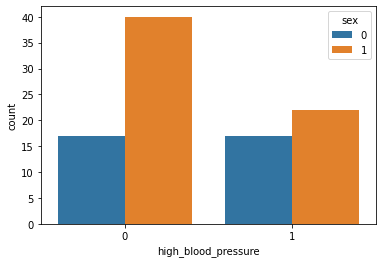

In [55]:
sns.countplot(x = 'high_blood_pressure', data = df_died, hue='sex')

# Train test split

In [11]:
X=df.loc[:, df.columns != 'DEATH_EVENT']
y=df['DEATH_EVENT']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train

array([[-1.3679055 ,  1.12366644, -0.51861616, ...,  0.74535599,
        -0.66022529,  1.31786894],
       [ 1.80097544,  1.12366644,  0.29392003, ..., -1.34164079,
        -0.66022529, -1.2935039 ],
       [ 0.77323027,  1.12366644, -0.52582497, ..., -1.34164079,
        -0.66022529, -0.57537637],
       ...,
       [ 2.05791174,  1.12366644, -0.48154226, ..., -1.34164079,
        -0.66022529, -0.45786459],
       [-0.08322404, -0.88994382,  0.01277633, ...,  0.74535599,
         1.51463449, -1.16293526],
       [ 0.77323027,  1.12366644, -0.41048396, ...,  0.74535599,
         1.51463449,  0.22109235]])

## Training the Logistic Regression model on the Training set

In [15]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
y_pred = classifier.predict(X_train)

In [18]:
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_train)))

Accuracy 86.60714285714286 %


In [86]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [93]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [95]:
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 77.33333333333333 %


<AxesSubplot:>

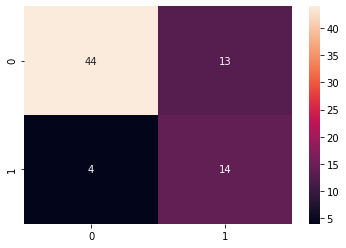

In [96]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        48
           1       0.78      0.52      0.62        27

    accuracy                           0.77        75
   macro avg       0.77      0.72      0.73        75
weighted avg       0.77      0.77      0.76        75



## Training the Random forest model on the Training set

In [19]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [100]:
y_pred = classifier.predict(X_test)

In [102]:
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 84.0 %


In [21]:
y_pred = classifier.predict(X_train)

In [22]:
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_train)))

Accuracy 100.0 %


<AxesSubplot:>

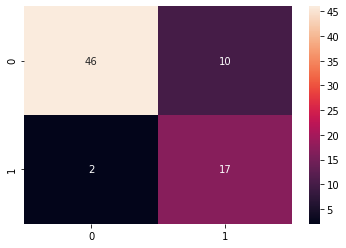

In [101]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88        48
           1       0.89      0.63      0.74        27

    accuracy                           0.84        75
   macro avg       0.86      0.79      0.81        75
weighted avg       0.85      0.84      0.83        75



## Training the SVM model on the Training set

In [105]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [106]:
y_pred = classifier.predict(X_test)

In [107]:
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 81.33333333333333 %


<AxesSubplot:>

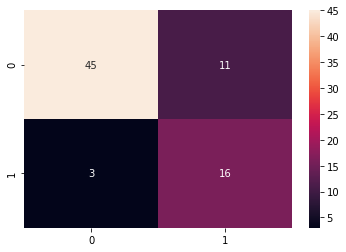

In [108]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87        48
           1       0.84      0.59      0.70        27

    accuracy                           0.81        75
   macro avg       0.82      0.77      0.78        75
weighted avg       0.82      0.81      0.80        75



## Training the Naive Bayes model on the Training set

In [112]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [113]:
y_pred = classifier.predict(X_test)

In [116]:
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 66.66666666666666 %


<AxesSubplot:>

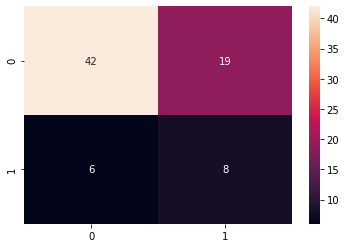

In [114]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77        48
           1       0.57      0.30      0.39        27

    accuracy                           0.67        75
   macro avg       0.63      0.59      0.58        75
weighted avg       0.65      0.67      0.63        75



## Training the XGBoost model on the Training set

In [121]:
classifier = xgb.XGBClassifier()
classifier.fit(X_train, y_train)

[00:08:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [122]:
y_pred = classifier.predict(X_test)

In [123]:
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 84.0 %


<AxesSubplot:>

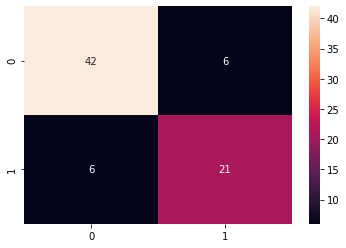

In [124]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [125]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        48
           1       0.78      0.78      0.78        27

    accuracy                           0.84        75
   macro avg       0.83      0.83      0.83        75
weighted avg       0.84      0.84      0.84        75



## Training the ANN model on the Training set

In [217]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
# ann.add(Dropout(0.2))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
# ann.add(Dropout(0.2))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [218]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [219]:
y_train.values

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0], dtype=int64)

In [220]:
history = ann.fit(X_train, y_train.values, batch_size = 1, epochs = 100)

Train on 224 samples
Epoch 1/100
224/224 [==============================] - 1s 3ms/sample - loss: 0.6755 - accuracy: 0.6830
Epoch 2/100
224/224 [==============================] - 0s 1ms/sample - loss: 0.6355 - accuracy: 0.7009
Epoch 3/100
224/224 [==============================] - 0s 1ms/sample - loss: 0.5975 - accuracy: 0.7188
Epoch 4/100
224/224 [==============================] - 0s 1ms/sample - loss: 0.5620 - accuracy: 0.7232
Epoch 5/100
224/224 [==============================] - 0s 1ms/sample - loss: 0.5189 - accuracy: 0.7455
Epoch 6/100
224/224 [==============================] - 0s 1ms/sample - loss: 0.4709 - accuracy: 0.7768
Epoch 7/100
224/224 [==============================] - 0s 1ms/sample - loss: 0.4311 - accuracy: 0.8259
Epoch 8/100
224/224 [==============================] - 0s 1ms/sample - loss: 0.4023 - accuracy: 0.8304
Epoch 9/100
224/224 [==============================] - 0s 1ms/sample - loss: 0.3821 - accuracy: 0.8259
Epoch 10/100
224/224 [==============================

224/224 [==============================] - 0s 1ms/sample - loss: 0.1899 - accuracy: 0.9241
Epoch 80/100
224/224 [==============================] - 0s 1ms/sample - loss: 0.1906 - accuracy: 0.9286
Epoch 81/100
224/224 [==============================] - 0s 1ms/sample - loss: 0.1876 - accuracy: 0.9286
Epoch 82/100
224/224 [==============================] - 0s 1ms/sample - loss: 0.1866 - accuracy: 0.9330
Epoch 83/100
224/224 [==============================] - 0s 1ms/sample - loss: 0.1842 - accuracy: 0.9330
Epoch 84/100
224/224 [==============================] - 0s 1ms/sample - loss: 0.1814 - accuracy: 0.9420
Epoch 85/100
224/224 [==============================] - 0s 1ms/sample - loss: 0.1802 - accuracy: 0.9330
Epoch 86/100
224/224 [==============================] - 0s 1ms/sample - loss: 0.1767 - accuracy: 0.9375
Epoch 87/100
224/224 [==============================] - 0s 1ms/sample - loss: 0.1771 - accuracy: 0.9330
Epoch 88/100
224/224 [==============================] - 0s 1ms/sample - loss:

In [221]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

Text(0, 0.5, 'Training Accuracy')

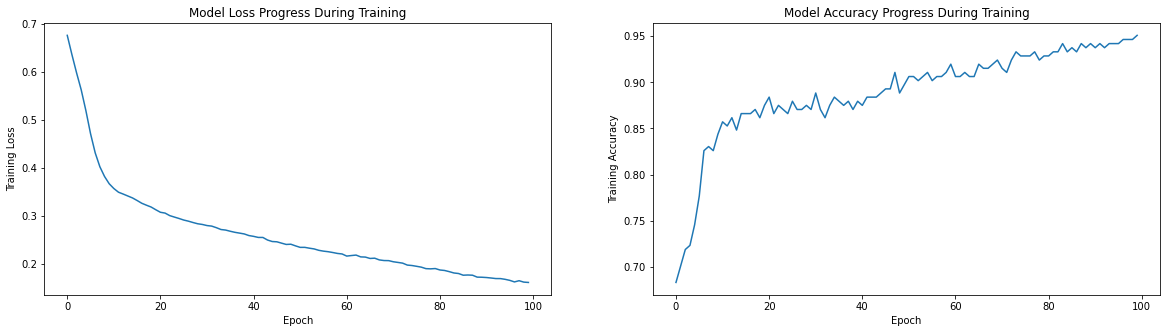

In [222]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')


In [223]:
y_pred = ann.predict(X_test)

In [224]:
for i in range(len(y_pred)):
    if y_pred[i][0]>0.5:
        y_pred[i][0]=1
    else:
        y_pred[i][0]=0

In [225]:
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 82.66666666666667 %


<AxesSubplot:>

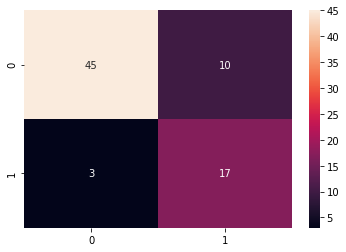

In [227]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [226]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87        48
           1       0.85      0.63      0.72        27

    accuracy                           0.83        75
   macro avg       0.83      0.78      0.80        75
weighted avg       0.83      0.83      0.82        75



### Predicting the result of a single observation

In [241]:
df.iloc[0].values[:-1]

array([7.50e+01, 0.00e+00, 5.82e+02, 0.00e+00, 2.00e+01, 1.00e+00,
       2.65e+05, 1.90e+00, 1.30e+02, 1.00e+00, 0.00e+00, 4.00e+00])

In [242]:
print(ann.predict(sc.transform([[7.50e+01, 0, 5.82e+02, 0.00e+00, 2.00e+01, 1.00e+00
                                 , 2.65e+05, 1.90e+00, 1.30e+02, 1.00e+00, 0.00e+00, 4.00e+00]])) > 0.5)

[[ True]]


In [243]:
df.iloc[0].values[-1]

1.0